/Users/stathis/Code/thesis/wave_propagation/experiments_results/ConvAE_LSTM_1ch_normalize
batch_num 0	future_frame_idx 0	type Initial input
batch_num 0	future_frame_idx 1	type Propagate
batch_num 0	future_frame_idx 2	type Propagate
batch_num 0	future_frame_idx 3	type Propagate
batch_num 0	future_frame_idx 4	type Propagate
batch_num 0	future_frame_idx 5	type Propagate
batch_num 0	future_frame_idx 6	type Propagate
batch_num 0	future_frame_idx 7	type Propagate


Testing batch 1 out of 31


batch_num 0	future_frame_idx 8	type Propagate


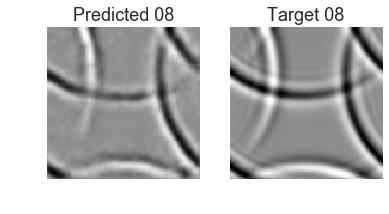

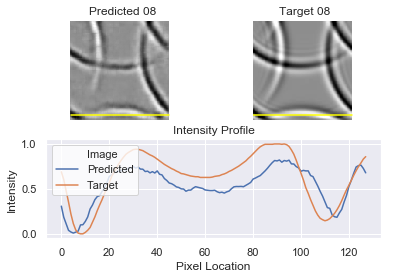

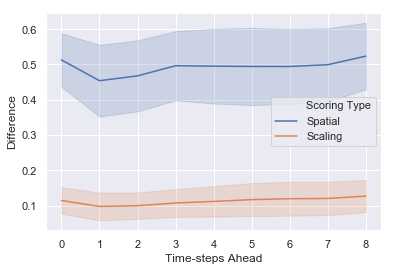

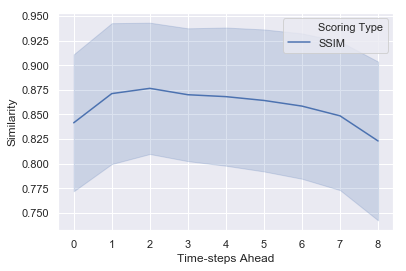

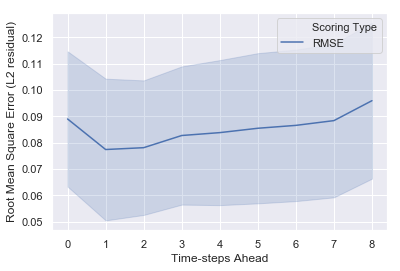

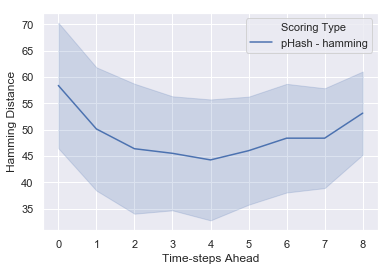

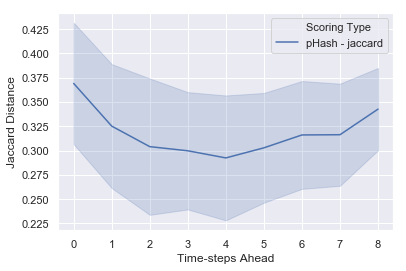

In [70]:
from __future__ import print_function
import logging
import torch
from torchvision import transforms
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn as nn
import os
import sys
sys.path.append('..')
sys.path.append('../..')
import platform
import time
from models.AR_LSTM import AR_LSTM, train_epoch, validate, test
from utils.Analyser import Analyser
from utils.io import save_network, load_network, save, load, create_results_folder
from utils.WaveDataset import create_datasets, transformVar, normalize
from utils.arg_extract import get_args
from utils.Scorekeeper import Scorekeeper
# import matplotlib
# matplotlib.use('Agg') # don't allow showing plots
import matplotlib.pyplot as plt
plt.ioff()

logging.basicConfig(format='%(message)s',level=logging.INFO)

if 'Darwin' in platform.system():
    base_folder = '/Users/stathis/Code/thesis/wave_propagation/'
    data_dir = base_folder
else:
    base_folder = '/home/s1680171/wave_propagation/'
    data_dir = '/disk/scratch/s1680171/wave_propagation/'
    
experiment_name='ConvAE_LSTM_1ch_normalize'
results_dir = base_folder + 'experiments_results/'+experiment_name

filename_data = os.path.join(results_dir,"all_data.pickle")

all_data = load(filename_data)
train_dataset = all_data["Training data"]
val_dataset = all_data["Validation data"]
test_dataset = all_data["Testing data"]
print(results_dir)

test_dataset.root_dir = '../Video_Data/'
normalize = {'mean': 0.5047, 'std': 0.1176}
test_dataset.transform = transforms.Compose([
    transforms.Resize(128),  # Already 184 x 184
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(mean=[normalize['mean']], std=[normalize['std']])])

test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=1)

device='cpu'
num_channels=1
model = AR_LSTM(num_channels=num_channels, device=device)
model = load_network(model, results_dir+"/model.pt")

test_starting_point=86
num_input_frames=5
reinsert_frequency=10
show_plots=True
debug=True

from utils.Scorekeeper import Scorekeeper
score_keeper=Scorekeeper(results_dir, normalize)
figures_dir = os.path.join(results_dir,'figures')
test(model, test_dataloader, test_starting_point, num_input_frames, reinsert_frequency,
            device, score_keeper, figures_dir, show_plots=show_plots, debug=debug, normalize=normalize)
score_keeper.plot(show_plots=show_plots)

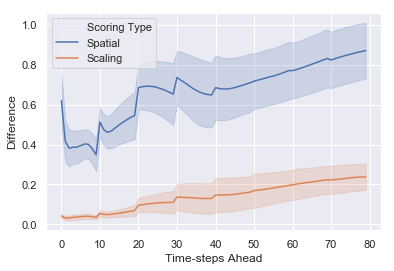

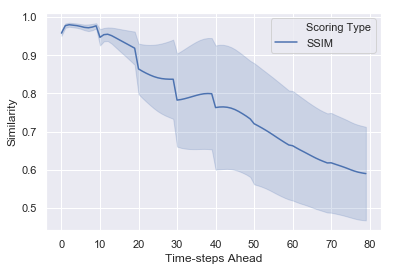

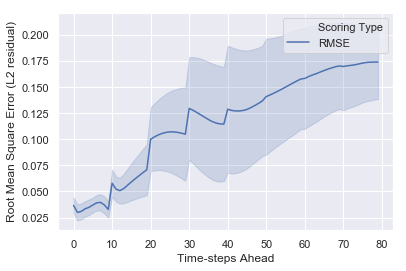

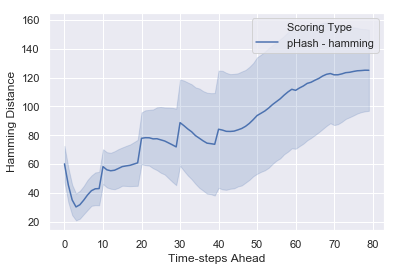

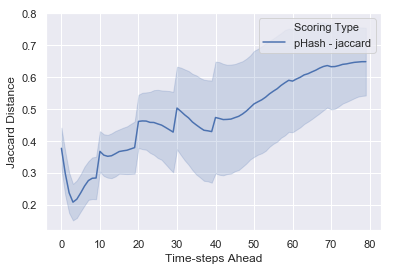

In [67]:
score_keeper.plot(show_plots)

'AR_LSTM(\n  (encoder_conv): Sequential(\n    (0): Conv2d(5, 60, kernel_size=(7, 7), stride=(2, 2), padding=(1, 1))\n    (1): BatchNorm2d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (2): Tanh()\n    (3): Conv2d(60, 120, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))\n    (4): BatchNorm2d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (5): Tanh()\n    (6): Conv2d(120, 240, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))\n    (7): BatchNorm2d(240, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (8): Tanh()\n    (9): Conv2d(240, 480, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))\n    (10): BatchNorm2d(480, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (11): Tanh()\n    (12): Dropout2d(p=0.25)\n  )\n  (encoder_linear): Sequential(\n    (0): Linear(in_features=30720, out_features=1000, bias=True)\n    (1): Tanh()\n    (2): Dropout(p=0.25)\n  )\n  (decoder_linear): Sequential(\n   

In [73]:
s